In [276]:
import pandas as pd
import numpy as np

In [277]:
filename = 'csv/Parking_statistic_Mashhad.csv'

pdf = pd.read_csv(filename)
pdf.head(5)

,Number,Name,Latitude,Longtitude,Capacity,Type,Type of roof,Organization
0,1,Alton,36.294358,59.594174,500,Vertical,Roof,Transport org
1,2,Pardis,36.296236,59.599737,40,Flat,Open,Transport org
2,3,Payam,36.314433,59.562062,274,Mechanized,Roof,Transport org
3,4,Kayam35,36.316213,59.563253,12,Mechanized,Roof,Transport org
4,5,Kolahdooz,36.298056,59.572738,70,Flat,Open,Transport org


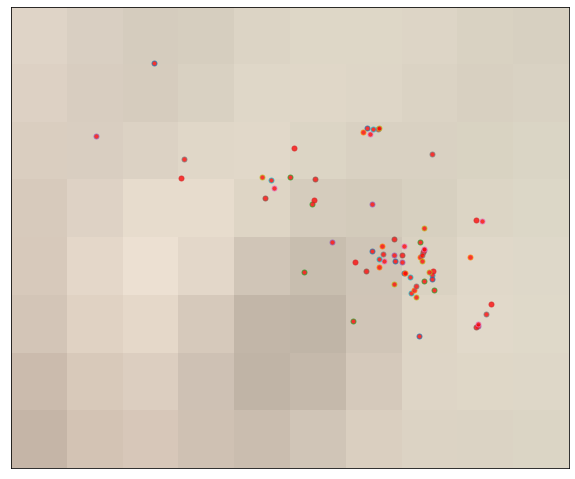

In [278]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (10,10)

llon=59.4
ulon=59.7
llat=36.2
ulat=36.4

pdf = pdf[(pdf['Longtitude'] > llon) & (pdf['Longtitude'] < ulon) & (pdf['Latitude'] > llat) &(pdf['Latitude'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 100.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

# my_map.drawcoastlines()
# my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Longtitude), np.asarray(pdf.Latitude))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#     x,y = my_map(row.Long, row.Lat)
    my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)

plt.show()

In [279]:
pdf.head(5)

,Number,Name,Latitude,Longtitude,Capacity,Type,Type of roof,Organization,xm,ym
0,1,Alton,36.294358,59.594174,500,Vertical,Roof,Transport org,21591.110695,13009.888853
1,2,Pardis,36.296236,59.599737,40,Flat,Open,Transport org,22209.711334,13268.937809
2,3,Payam,36.314433,59.562062,274,Mechanized,Roof,Transport org,18020.446284,15779.743363
3,4,Kayam35,36.316213,59.563253,12,Mechanized,Roof,Transport org,18152.893131,16025.409189
4,5,Kolahdooz,36.298056,59.572738,70,Flat,Open,Transport org,19207.623653,13520.127399


In [280]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
# Compute DBSCAN
db = DBSCAN(eps=0.43, min_samples=4).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf.head(5)

,Number,Name,Latitude,Longtitude,Capacity,Type,Type of roof,Organization,xm,ym,Clus_Db
0,1,Alton,36.294358,59.594174,500,Vertical,Roof,Transport org,21591.110695,13009.888853,0
1,2,Pardis,36.296236,59.599737,40,Flat,Open,Transport org,22209.711334,13268.937809,0
2,3,Payam,36.314433,59.562062,274,Mechanized,Roof,Transport org,18020.446284,15779.743363,1
3,4,Kayam35,36.316213,59.563253,12,Mechanized,Roof,Transport org,18152.893131,16025.409189,1
4,5,Kolahdooz,36.298056,59.572738,70,Flat,Open,Transport org,19207.623653,13520.127399,-1


C:\Users\fadak\AppData\Local\Temp/ipykernel_15976/622800894.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])


Cluster 0, There are 36 Parking lots in this zone and Avg Capacity of each Parking is: 174.0
Cluster 1, There are 8 Parking lots in this zone and Avg Capacity of each Parking is: 156.0
Cluster 2, There are 6 Parking lots in this zone and Avg Capacity of each Parking is: 520.0
Cluster 3, There are 5 Parking lots in this zone and Avg Capacity of each Parking is: 50.0


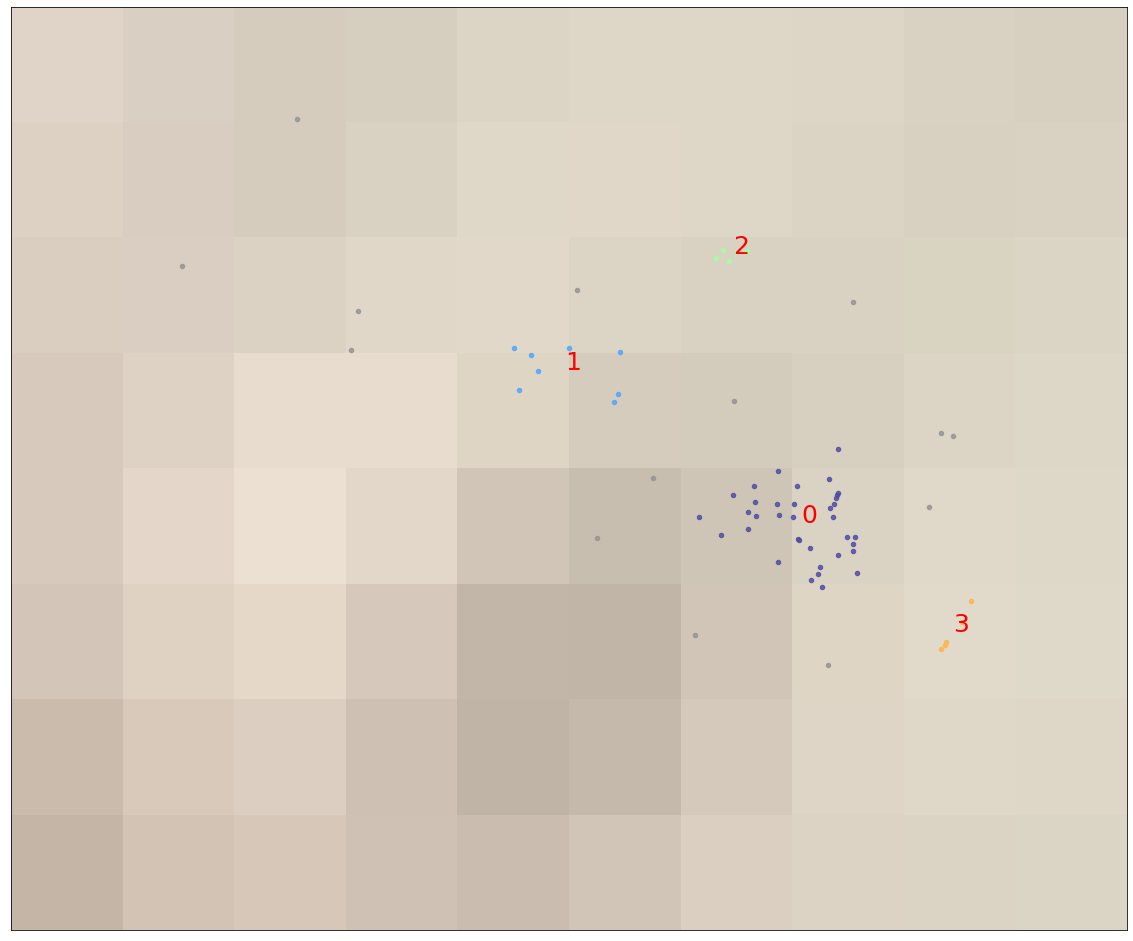

In [285]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (20,20)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

# my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    clust_set = pdf[pdf.Clus_Db == clust_number]                    

        
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', There are '+str(len(clust_set))+' Parking lots in this zone and Avg Capacity of each Parking is: '+ str(round(np.mean(clust_set.Capacity),0)))

In [282]:
 for j in np.unique(np.array(pdf[['Clus_Db']])):
    num_private = 0
    for i in np.array(pdf):
        if i[-1] == j and i[-4] == 'Private':
                num_private += 1
    print(f'The number of private parking in zone {j} is: {num_private}')

The number of private parking in zone -1 is: 5
The number of private parking in zone 0 is: 9
The number of private parking in zone 1 is: 2
The number of private parking in zone 2 is: 6
The number of private parking in zone 3 is: 5


In [283]:
 for j in np.unique(np.array(pdf[['Clus_Db']])):
    num_private = 0
    for i in np.array(pdf):
        if i[-1] == j and i[-6] == 'Flat':
                num_private += 1
    print(f'The number of Flat parking in zone {j} is: {num_private}')

The number of Flat parking in zone -1 is: 11
The number of Flat parking in zone 0 is: 26
The number of Flat parking in zone 1 is: 3
The number of Flat parking in zone 2 is: 2
The number of Flat parking in zone 3 is: 5
